In [66]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [67]:
np.random.seed(42)

#paramètres au hasard
d=2
r=[5,9]
M=np.identity(d)
x0=np.array([1.9, 2.05])
#x0=np.array([0.09, 0.09])
x0_point=np.random.multivariate_normal(np.zeros(d), np.linalg.inv(M))
print(x0_point)
t=0.896
t_max=5
T=5
pas=0.01
temps=np.arange(0, t_max, pas)

[ 0.49671415 -0.1382643 ]


In [68]:
def fct_a(x0_point):
    return x0_point

def fct_b(x0):
    return(x0)

In [69]:
def position(x0, x0_point, t):
    a = fct_a(x0_point)
    b = fct_b(x0)
    x = a * np.sin(t) + b * np.cos(t)
    return x

print(position(x0, x0_point, t))

[1.57485416 1.17275201]


In [70]:
def fct_trajectoire(x0, x0_point, temps):
    n=len(temps)
    trajectoire=[x0]*n
    for i in range(n) :
        trajectoire[i]=position(x0,x0_point, temps[i]).tolist()
    return(trajectoire)

print(fct_trajectoire(x0, x0_point, temps))

[[1.9, 2.05], [1.904872059536498, 2.048514880886387], [1.9095536334544305, 2.046824911991775], [1.914044253600307, 2.044930262311646], [1.918343470915855, 2.0428311213093884], [1.9224508554829258, 2.040527698897354], [1.9263659965664852, 2.0380202254158633], [1.9300885026556875, 2.035308951610176], [1.9336180015030262, 2.032394148605413], [1.9369541401615575, 2.0292761078794452], [1.9400965850201957, 2.025955141233747], [1.9430450218370734, 2.022431580762216], [1.9457991557709664, 2.018705778817963], [1.9483587114107763, 2.0147781079780773], [1.9507234328030718, 2.0106489610063703], [1.9528930834776843, 2.0063187508140974], [1.954867446471355, 2.00178791041867], [1.956646324349429, 1.9970568929003518], [1.9582295392256013, 1.992126171356952], [1.9596169327797033, 1.986996238856516], [1.9608083662735363, 1.9816676083880191], [1.9618037205647434, 1.976140812810068], [1.962602896118725, 1.9704164047976136], [1.9632058130185919, 1.964494956786688], [1.9636124109731559, 1.9583770609171578],

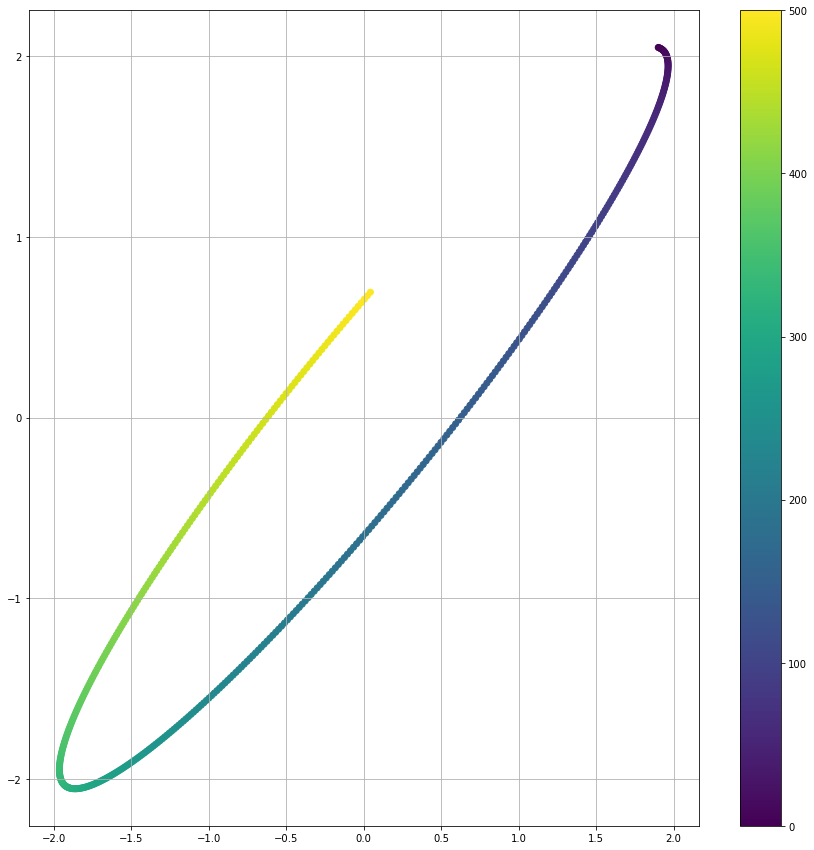

In [71]:
def plot_trajectory_2D(trajectoire):
    plt.figure(figsize=(15, 15))
    x1 = []
    x2 = []
    times = []
    for position in trajectoire:
        x1.append(position[0])
        x2.append(position[1])
    colors = np.linspace(0, len(temps), len(x1))
    plt.scatter(x1, x2, c=colors, cmap='viridis')
    #plt.plot(x1, x2, marker='o', linestyle='-')
    plt.colorbar() 
    plt.title('')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)

    
plot_trajectory_2D(fct_trajectoire( x0, x0_point, temps))
#plt.show()


In [72]:
#F=np.array([ [-1, 0], [0, -1],[1,0], [0,1]])
#g=[2, 1, 0.4, 0.15]
F=np.array([[-1,1],[1.1,-1]])
g=[0,0]


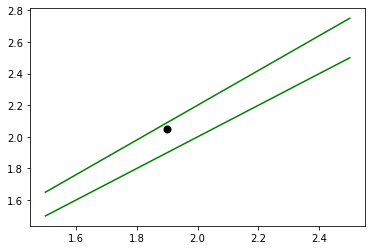

In [73]:
def tracer_contraintes(F,g,x0):
    # tracer les contraintes en dim 2
    xmin =1.5
    xmax = 2.5
    #vecteur x naifs
    x = np.linspace(xmin, xmax, 100)

    d=len(g)
    for i in range(d):
        a,b=F[i][0],F[i][1]
        if a==0:
            if b<0:
                plt.axhline(g[i], color='blue', lw=2)
            else :
                plt.axhline(-g[i], color='blue', lw=2)
        elif b==0:
            if a<0:
                plt.axvline(g[i], color='red', lw=2)
            else :
                plt.axvline(-g[i], color='red', lw=2)
        else :
            plt.plot(x, (-g[i]-a*x)/b, color='green')

    #plot le point initial (permet de voir dans quelle partie du graph on évolut)
    plt.scatter(x0[0], x0[1], color="black", lw=2)
    # Show the graph
    #plt.show()

tracer_contraintes(F,g,x0)
#plt.show()

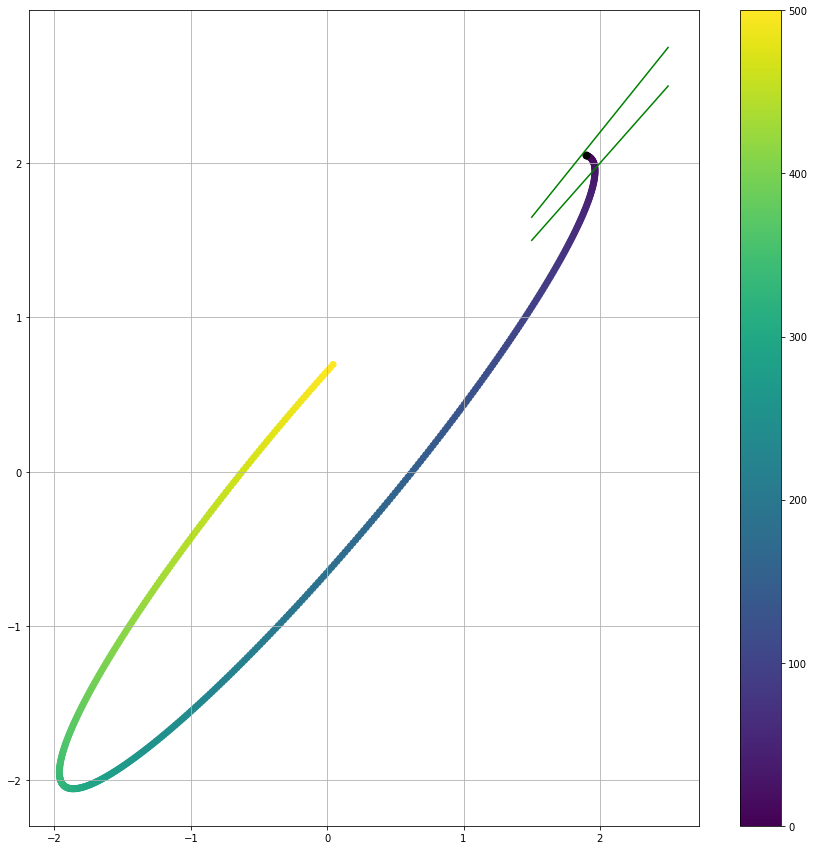

In [74]:
def plot_trajectory_2D_and_constraintes(x0, x0_point, temps, F, g):
    plot_trajectory_2D(fct_trajectoire( x0, x0_point, temps))
    tracer_contraintes(F,g,x0)
    # Show the graph
    #plt.show()

plot_trajectory_2D_and_constraintes(x0, x0_point, temps, F, g)

In [75]:
def toucher_contrainte(F, g, x0, x0_point):
    m=len(g)
    a,b=fct_a(x0_point),fct_b(x0)
    touche_mur = [0]*m
    for j in range(m):
        fa_j=sum(F[j]*a)
        fb_j=sum(F[j]*b)
        u_j = np.sqrt(fa_j**2+fb_j**2)
        if u_j>np.abs(g[j]):
            phi_j =np.arctan(-fa_j / fb_j)
            touches=[((np.arccos(-g[j]/u_j)-phi_j+i*np.pi)*(-1*k)+np.pi*l, phi_j-i*np.pi)  for i in range(-2,2) for k in [-1, 1] for l in range(-2,2)]
            touches_positifs=[t for t in touches if t[0]>=0]
            touche_mur_j=[t[0] for t in touches_positifs if sum(F[j]*position(x0, x0_point, t[0]))+g[j]<0.00000001]
            touche_mur[j]=min(touche_mur_j)
        else :
            touche_mur[j]=np.inf
    return touche_mur

print(toucher_contrainte(F, g, x0, x0_point))



[0.23197583655569765, 3.0832349685754443]


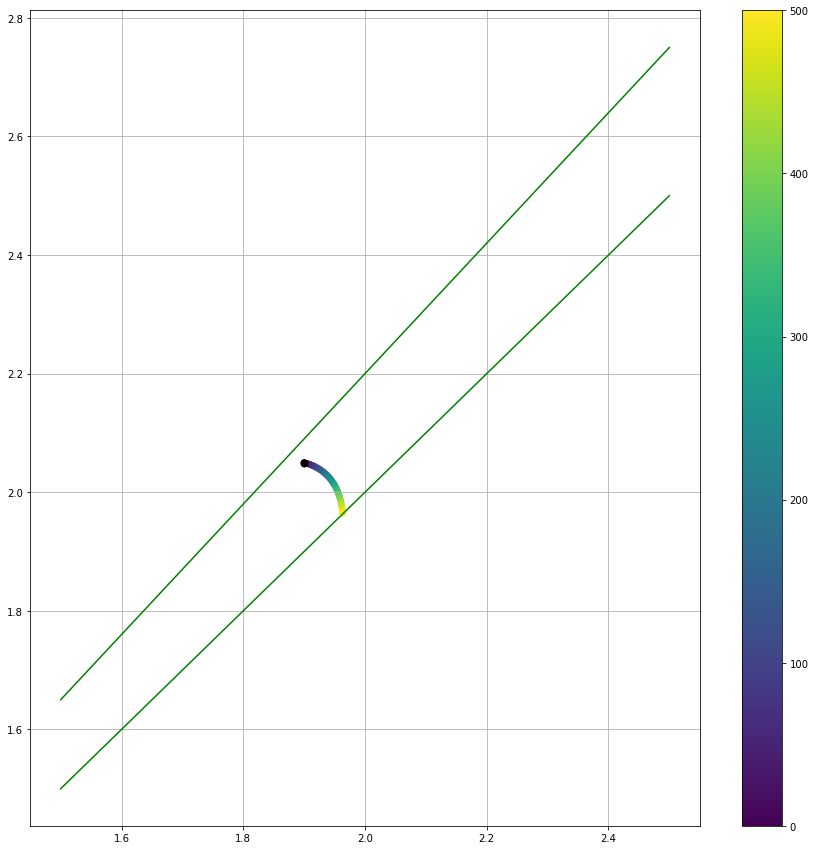

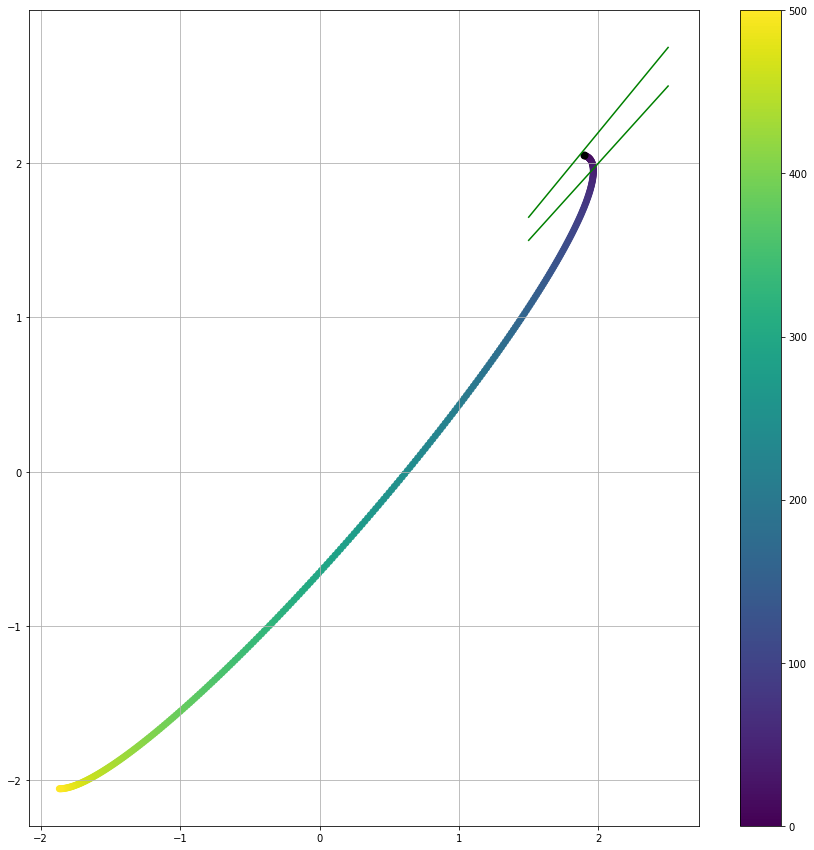

In [76]:
toucher=toucher_contrainte(F, g, x0, x0_point)
#print(min(toucher))
#temps2=np.arange(0, min(min(toucher),t_max), pas)
#plot_trajectory_2D_and_constraintes( x0, x0_point, temps2, F, g)
for i in range(len(g)):
    if toucher[i]<np.inf:
        temps3=np.arange(0, toucher[i], pas)
        plot_trajectory_2D_and_constraintes( x0, x0_point, temps3, F, g)

In [77]:
def premiere_contrainte(F, g, x0, x0_point):
    temps=toucher_contrainte(F, g, x0, x0_point)
    return({'indice de reflexion':np.argmin(temps), 'temps de reflexion':temps[np.argmin(temps)]})

point_R=position(x0, x0_point, premiere_contrainte(F, g, x0, x0_point)['temps de reflexion'])
print(point_R)
print(premiere_contrainte(F, g, x0, x0_point))

[1.96330171 1.96330171]
{'indice de reflexion': 0, 'temps de reflexion': 0.23197583655569765}


In [78]:
def vitesse(x0, x0_point, t):
    a,b=fct_a(x0_point), fct_b(x0)
    return(a*np.cos(t)-b*np.sin(t))

def vitesse_reflexion(x0, x0_point, temps_reflexion, indice_reflexion, F, g):
    a,b=fct_a(x0_point), fct_b(x0)
    vitesse=a*np.cos(temps_reflexion)-b*np.sin(temps_reflexion)
    alpha=np.dot(F[indice_reflexion], vitesse)/np.linalg.norm(F[indice_reflexion])**2
    return(vitesse-2*alpha*F[indice_reflexion])

vitesse=vitesse(x0, x0_point, premiere_contrainte(F, g, x0, x0_point)['temps de reflexion'],)
vitesse_R=vitesse_reflexion(x0, x0_point, premiere_contrainte(F, g, x0, x0_point)['temps de reflexion'], premiere_contrainte(F, g, x0, x0_point)['indice de reflexion'], F, g)
print(vitesse_R)

[-0.60585757  0.04659751]


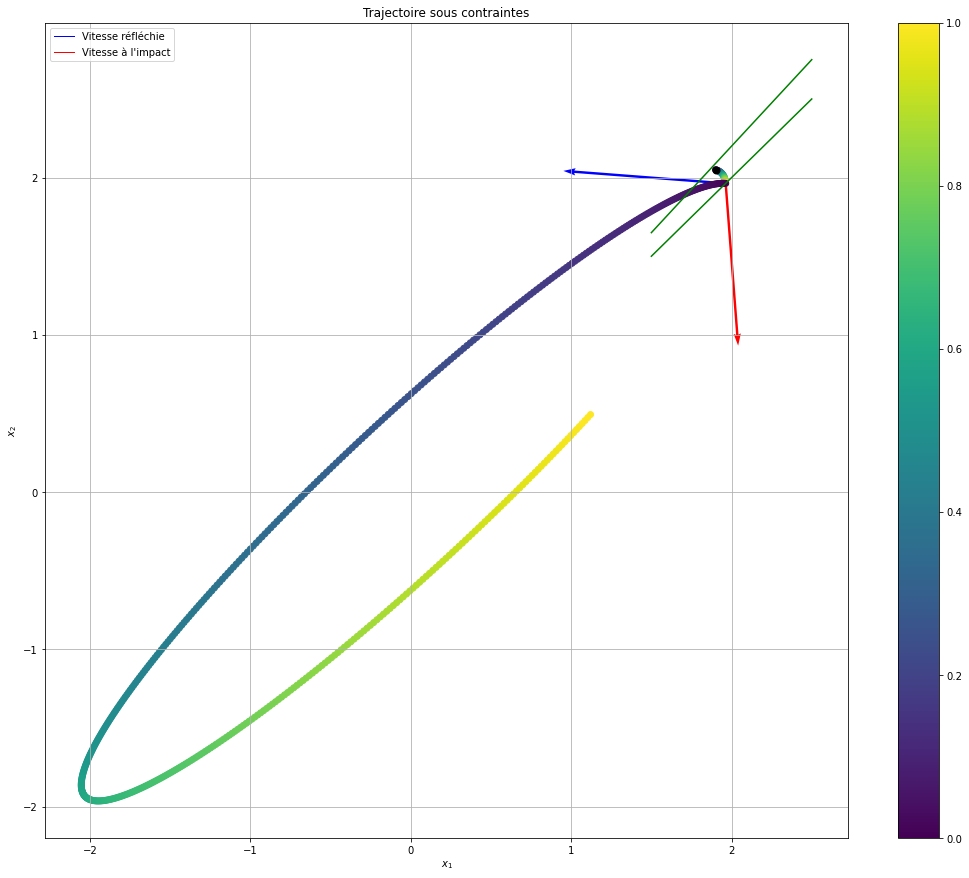

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

def plot_trajectory_2D_2(trajectoire, colors):
    x1 = [position[0] for position in trajectoire]
    x2 = [position[1] for position in trajectoire]
    plt.scatter(x1, x2, c=colors, cmap='viridis')

def tracer_contraintes(F, g, x0):
    xmin =1.5
    xmax = 2.5
    x = np.linspace(xmin, xmax, 100)

    d = len(g)
    for i in range(d):
        a, b = F[i][0], F[i][1]
        if a == 0:
            if b < 0:
                plt.axhline(g[i], color='blue', lw=2)
            else:
                plt.axhline(-g[i], color='blue', lw=2)
        elif b == 0:
            if a < 0:
                plt.axvline(g[i], color='red', lw=2)
            else:
                plt.axvline(-g[i], color='red', lw=2)
        else:
            plt.plot(x, (-g[i] - a * x) / b, color='green')

    plt.scatter(x0[0], x0[1], color="black", lw=2)

def plot_trajectory_2D_and_constraintes_reflexion(x0, x0_point, temps, F, g):
    traj = fct_trajectoire(x0, x0_point, np.arange(0, premiere_contrainte(F, g, x0, x0_point)['temps de reflexion'], pas))
    colors = np.linspace(0, len(temps), len(traj))
    plot_trajectory_2D_2(traj, colors)
    
    traj_R = fct_trajectoire(point_R, vitesse_R, np.arange(0, t_max, pas))
    colors_R = np.linspace(0, len(temps), len(traj_R))
    plot_trajectory_2D_2(traj_R, colors_R)
    
    tracer_contraintes(F, g, x0)

    plt.colorbar()
    plt.title('Trajectoire sous contraintes')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.grid(True)
    plt.show()

plt.figure(figsize=(18, 15))
#plt.xlim(1.7, 2)
#plt.ylim(1.8, 2.1)
plt.quiver(point_R[0], point_R[1], vitesse_R[0], vitesse_R[1], scale=3, color='blue', width=0.003)
plt.quiver(point_R[0], point_R[1], vitesse[0], vitesse[1], scale=3, color='red', width=0.003)
legend_elements = [Line2D([0], [0], color='blue', lw=1, label='Vitesse réfléchie'),
                   Line2D([0], [0], color='red', lw=1, label="Vitesse à l'impact")]
plt.legend(handles=legend_elements)

plot_trajectory_2D_and_constraintes_reflexion(x0, x0_point, temps, F, g)


In [80]:
def plot_trajectory_2D_and_constraintes_2(x0, trajectoire, F, g):
    plot_trajectory_2D(trajectoire)
    tracer_contraintes(F,g,x0)

while
0.5125077139252796
while
0.7569915650279111
while
0.9452512773090789
while
1.0833096000147349
while
1.1865130850486036
while
1.2685319114980411
while
1.3331335260778587
while
1.3824269599110615
while
1.4186717552259427
while
1.451252663709351
while
1.4818412812973767
while
1.509768597520821
while
1.5276589885180594
while
1.5434330586694898
while
1.5593503796967265
while
1.5735273942340406
while
0.13179703617624772
while
0.24059949409228287
while
0.38265490132458413
while
0.5956222237649256
while
0.8937082134425909
while
1.2620626299483089
while
1.6341948959486619
while
1.621373185092337
0
while
0.0037293054585973984
1
while
0.005648116445276408
1
while
0.009140847449229161
1
while
0.012319406482713235
1
while
0.019272041337421664
1
while
0.028772046642832727
1
while
1.4975246528981543
1
while
2.33941693687329
1
while
0.10947647990876397
2
while
0.20988077922859527
2
while
0.31777278835690814
2
while
0.4150072942930507
2
while
0.5083090602670597
2
while
0.5997730936842542
2
while


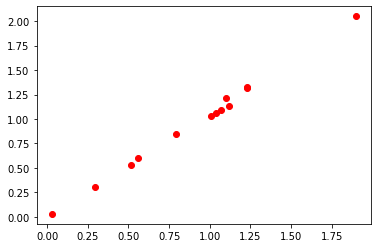

In [81]:
traj=[x0]
chaine=[x0]
vitesse=np.array(x0_point)
    #
temps_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['temps de reflexion']
indice_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['indice de reflexion']
temps_global=temps_atteinte
#tracer_contraintes(F,g,np.array(traj[-1]))
#plot_trajectory_2D_and_constraintes(x0, x0_point, np.arange(0,temps_atteinte, pas), F, g)
while temps_global<np.pi/2:
    print("while")
    traj+=fct_trajectoire(np.array(traj[-1]), vitesse, np.arange(0,temps_atteinte, pas))
    #plot_trajectory_2D(fct_trajectoire(np.array(traj[-1]), vitesse, np.arange(0,temps_atteinte, pas)))
    vitesse=np.array(vitesse_reflexion(np.array(traj[-1]), vitesse, temps_atteinte, indice_atteinte, F, g))
    temps_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['temps de reflexion']
    indice_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['indice de reflexion']
    temps_global+=temps_atteinte
    print(temps_global)
traj+=fct_trajectoire(np.array(traj[-1]), vitesse, np.arange(0,np.pi/2-(temps_global-temps_atteinte), pas))
chaine+=[traj[-1]]
vitesse=np.random.multivariate_normal(np.zeros(d), np.linalg.inv(M))
    #
temps_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['temps de reflexion']
indice_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['indice de reflexion']
temps_global=temps_atteinte
#tracer_contraintes(F,g,np.array(traj[-1]))
#plot_trajectory_2D_and_constraintes(x0, x0_point, np.arange(0,temps_atteinte, pas), F, g)
while temps_global<np.pi/2:
    print("while")
    traj+=fct_trajectoire(np.array(traj[-1]), vitesse, np.arange(0,temps_atteinte, pas))
    #plot_trajectory_2D(fct_trajectoire(np.array(traj[-1]), vitesse, np.arange(0,temps_atteinte, pas)))
    vitesse=np.array(vitesse_reflexion(np.array(traj[-1]), vitesse, temps_atteinte, indice_atteinte, F, g))
    temps_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['temps de reflexion']
    indice_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['indice de reflexion']
    temps_global+=temps_atteinte
    print(temps_global)
traj+=fct_trajectoire(np.array(traj[-1]), vitesse, np.arange(0,np.pi/2-(temps_global-temps_atteinte), pas))
chaine+=[traj[-1]]
for i in range(10):
    vitesse=np.random.multivariate_normal(np.zeros(d), np.linalg.inv(M))
        #
    if premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['temps de reflexion']<np.inf:
        temps_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['temps de reflexion']
    else:
        temps_atteinte=np.pi/2
    indice_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['indice de reflexion']
    temps_global=temps_atteinte
    #tracer_contraintes(F,g,np.array(traj[-1]))
    #plot_trajectory_2D_and_constraintes(x0, x0_point, np.arange(0,temps_atteinte, pas), F, g)
    while temps_global<=np.pi/2:
        print("while")
        traj+=fct_trajectoire(np.array(traj[-1]), vitesse, np.arange(0,temps_atteinte, pas))
        #plot_trajectory_2D(fct_trajectoire(np.array(traj[-1]), vitesse, np.arange(0,temps_atteinte, pas)))
        vitesse=np.array(vitesse_reflexion(np.array(traj[-1]), vitesse, temps_atteinte, indice_atteinte, F, g))
        if premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['temps de reflexion']<np.inf:
            temps_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['temps de reflexion']
        else:
            temps_atteinte=np.pi/2
        indice_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['indice de reflexion']
        temps_global+=temps_atteinte
        print(temps_global)
        print(i)
    traj+=fct_trajectoire(np.array(traj[-1]), vitesse, np.arange(0,np.pi/2-(temps_global-temps_atteinte), pas))
    chaine+=[traj[-1]]


#plot_trajectory_2D_and_constraintes_2(x0, traj, F, g)
for point in chaine :
    plt.scatter(point[0], point[1], c='red')

In [82]:
def trajectoire_contrainte(F, g, x0, taille_ech, pas):
    traj=[x0]
    chaine=[x0]
    vitesse=np.array(x0_point)
    #
    temps_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['temps de reflexion']
    indice_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['indice de reflexion']
    temps_global=temps_atteinte
    tracer_contraintes(F,g,np.array(traj[-1]))
    plot_trajectory_2D_and_constraintes(x0, x0_point, np.arange(0,temps_atteinte, pas), F, g)
    while temps_global<np.pi/2:
        print("while")
        traj+=fct_trajectoire(np.array(traj[-1]), vitesse, np.arange(0,temps_atteinte, pas))
        plot_trajectory_2D(fct_trajectoire(np.array(traj[-1]), vitesse, np.arange(0,temps_atteinte, pas)))
        vitesse=np.array(vitesse_reflexion(np.array(traj[-1]), vitesse, temps_atteinte, indice_atteinte, F, g))
        temps_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['temps de reflexion']
        indice_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['indice de reflexion']
        temps_global+=temps_atteinte
    traj+=fct_trajectoire(np.array(traj[-1]), vitesse, np.arange(0,np.pi/2-(temps_global-temps_atteinte), pas))
    chaine+=[traj[-1]]
    for n in range(taille_ech-1):
        vitesse=np.array(np.random.multivariate_normal(np.zeros(d), np.linalg.inv(M)))
        temps_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['temps de reflexion']
        indice_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['indice de reflexion']
        temps_global=temps_atteinte
        tracer_contraintes(F,g,np.array(traj[-1]))
        plot_trajectory_2D(fct_trajectoire(np.array(traj[-1]), vitesse, np.arange(0,temps_atteinte, pas)))
        while temps_global<np.pi/2:
            traj+=fct_trajectoire(np.array(traj[-1]), vitesse, np.arange(0,temps_atteinte, pas))
            plot_trajectory_2D(fct_trajectoire(np.array(traj[-1]), vitesse, np.arange(0,temps_atteinte, pas)))
            vitesse=np.array(vitesse_reflexion(np.array(traj[-1]), vitesse, temps_atteinte, indice_atteinte, F, g))
            temps_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['temps de reflexion']
            indice_atteinte=premiere_contrainte(F, g, np.array(traj[-1]), vitesse)['indice de reflexion']
            temps_global+=temps_atteinte
        traj+=fct_trajectoire(np.array(traj[-1]), vitesse, np.arange(0,np.pi/2-(temps_global-temps_atteinte), pas))
        chaine+=[traj[-1]]
    return {'trajectoire':traj, 'chaine':chaine}

np.random.seed(43)
taille_ech=6
plot_trajectory_2D(trajectoire_contrainte(F, g, x0, taille_ech, 0.001)['trajectoire'])
chaine=trajectoire_contrainte(F, g, x0, taille_ech, 0.001)['chaine']
for point in chaine:
    plt.scatter(point[0], point[1], c='black')

while
while
while
while
while
while
while
while
while
while
while
while
while
while
while


/tmp/ipykernel_4326/201693906.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 15))


while
while
while
while
while
while
while
while
while
while
while
while
while
while
while
